In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, ifft
from IPython.display import Audio, display
from scipy.io import wavfile
from ipywidgets import widgets
from functools import partial
import pandas as pd
from fractions import Fraction

In [38]:
def create_signal(frequency, amplitude, delay, phase=0, sampling=44100, seconds=1.0):
  timesteps = np.linspace(0,seconds, int(seconds * sampling))
  # return np.sum(amplitude * np.sin(frequency * 2*np.pi * (timesteps[:, np.newaxis]-delay)*(timesteps[:, np.newaxis]-delay > 0)), axis=1), timesteps
  return np.sum(amplitude * triangle(frequency, (timesteps[:, np.newaxis]-delay)*(timesteps[:, np.newaxis]-delay > 0)), axis=1), timesteps

def create_waves(frequency, amplitude, phase=0, sampling=44100, seconds=1.0):
  timesteps = np.linspace(0,seconds, int(seconds * sampling))
  # return amplitude * np.sin(frequency * 2*np.pi * timesteps[:, np.newaxis]), timesteps
  return amplitude * triangle(frequency, timesteps[:, np.newaxis]), timesteps

def triangle(frequency, t):
  phase = (t * frequency + 0.25) % 1 - 0.25
  return (phase <= 0.25) * phase + (phase > 0.25) * (0.5 - phase)

def nonlinearity(x, param=1.0): # param for scaling of argument; higher values = more nonlinearity
  #return np.exp(x*param)
  return np.sign(x)*np.log(1+np.abs(x*param))

def myAudio(signal, rate=44100, autoplay=False, time_fade=0.2):
  length = signal.shape[0]
  print(length)
  fade = np.minimum(np.ones(length),np.arange(length)/(time_fade * rate))
  return Audio(signal * fade * fade[::-1],rate=rate,autoplay=autoplay)

def toEDO(ratio, n=12):
    return 2**((np.round(np.log(ratio) * n / np.log(2)))/n)

def ratio2freq(ratio, base=220):
    return base * ratio


88200


88200


88200


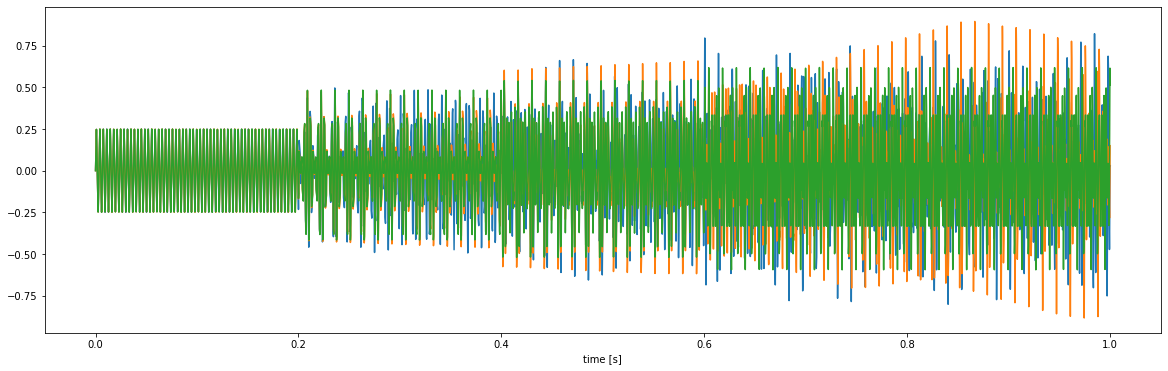

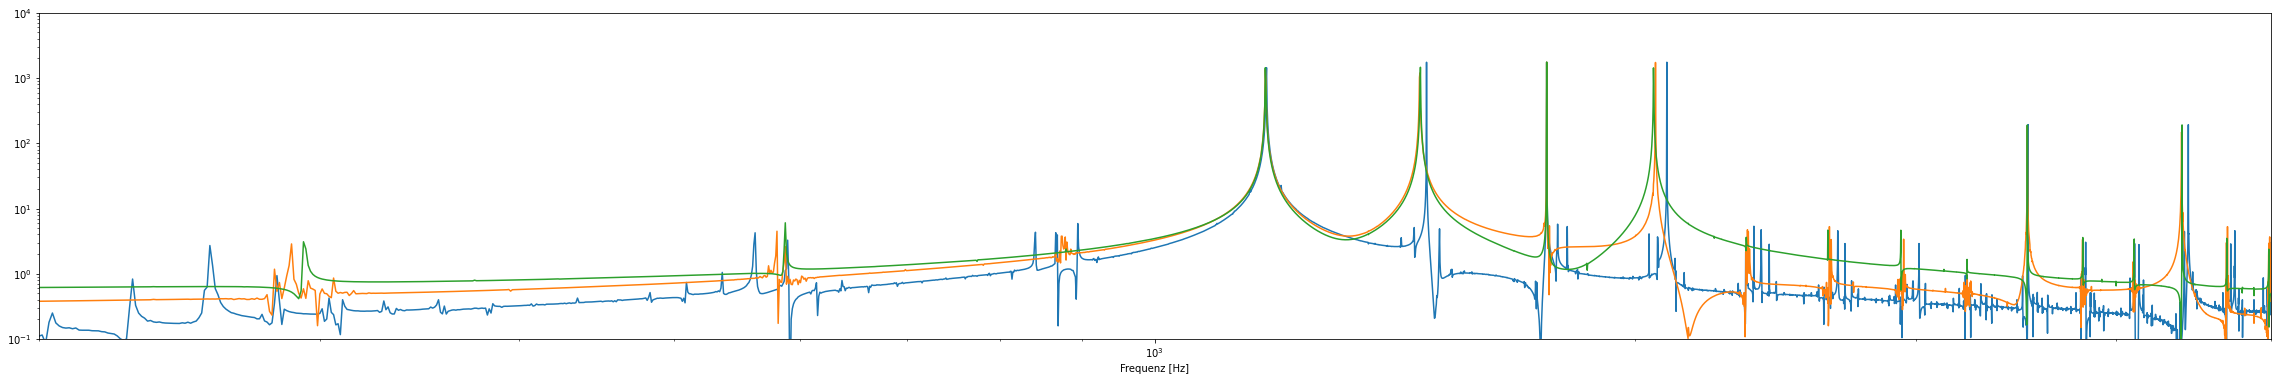

In [44]:
#frequency = np.array([100., 200., 300, 400])

#frequency_edo12 = 220 * 2**(np.array([5,8,12,14])/12)
#frequency_edo53 = 220 * 2**(np.array([22,36,53,62])/53)
#frequency_edo53 = 220 * 2**(np.array([22,34,53,61])/53)
#frequency_rein1 = 220 * 4/3 * np.array([1, 7/6, 9/6, 10/6])
#frequency_rein2 = 220 * 4/3 * np.array([1, 12/10, 15/10, 17/10])
dursept = 4/3*np.array([1,5/4,6/4,7/4])

dursept_edo12 = 220 * toEDO(dursept, 12) # Durseptakkord in EDO12


dursept_edo53 = 220 * toEDO(dursept, 53) # Dursept in EDO53

dursept_rein = 220 * dursept # Dursept rein

mollsept = 4/3 * np.array([1,12/10, 15/10, 17/10])
mollsept_edo12 = 220 * toEDO(mollsept, 12) # Mollseptakkord in EDO12
mollsept_edo53 = 220 * toEDO(mollsept, 53) # Mollseptakkord in EDO53
mollsept_rein = 220 * mollsept # Mollsept rein

doppeltritone = 4/3 * np.array([1, 12/10, 14/10, 17/10])
doppeltritone_rein = 220 * doppeltritone # doppeltritone rein
doppeltritone_edo12 = 220* toEDO(doppeltritone, 12)
doppeltritone_edo53 = 220 * toEDO(doppeltritone, 53) # doppeltritone in EDO53

amplitude = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
delay = np.array([0.0,0.2,0.4,0.6,0.8,1.0,1.2])

# list of chords to display.
# chords = [dursept_edo12, dursept_edo53, dursept_rein, ]
# chords = [mollsept_edo12, mollsept_edo53, mollsept_rein, ]
chords = [mollsept_edo12, mollsept_edo53, mollsept_rein ]

to_display = []
for chord in chords:
    notes = len(chord)
    signal, timesteps = create_signal(frequency=chord, amplitude=amplitude[:notes], delay=delay[:notes], phase=0, sampling=44100, seconds=5.0)
    to_display.append(signal)

max_play_time = 2.0
for signal in to_display:
    display(myAudio(signal[timesteps < max_play_time],rate=44100, autoplay=False))

plot_time = 1.0

plt.figure(1, figsize=(20,6))
plt.xlabel("time [s]")
for signal in to_display:
    plt.plot(timesteps[timesteps < plot_time], (1*signal[timesteps < plot_time]))

plt.figure(2, figsize=(40,6))
plt.subplot(111, xscale='log', yscale='log')
plt.xlabel("Frequenz [Hz]")
plt.xlim(200,5000)
plt.ylim(bottom=1e-1, top=1e4)
for signal in to_display:
    plt.plot(np.abs(fft(nonlinearity(signal[timesteps > 1.0], 0.1))))

A = 100, B = 152
B-A = 52, 2*A-B = 48
A = 100, 2*B-2*A = 104, 4*A-2*B=96
2*A = 200, 2*B-A = 204, 4*B-4*A = 208

#print((3/2)**3) #3 Quinten
#print(2**2) #2 Oktaven
81/80 #syntonisches Komma
128/125 #Diesis
(3/2)^12/2^7 #pythagoräisches Komma
#print(6/5)

1 (C) 9/8 (D)   6/5 (Es)   5/4 (E)    4/3 (F)  3/2 (G) 8/5 (As) 5/3 (A) 15/8 (H) 2/1 (C) --> 5-limit tuning
Ganztöne?
C - D: 9/8
D - E: 10/9
Es - F: 10/9
F - G: 9/8
G - A: 10/9
A - H: 9/8

Halbtöne? 16/15, 25/24, 16/15, 16/15, 25/24, 16/15
Große Terzen? 5/4, 5/4, 32/25, 5/4, 5/4

In [8]:
print(9/8, 2**(2/12))
print(5/4, 2**(4/12))
print(7/4, 2**(10/12))

1.125 1.122462048309373
1.25 1.2599210498948732
1.75 1.7817974362806785


(3/2)**a = 2**b 
a * ln(3/2) = b * ln(2)
a/b = ln(2) / ln(3/2)

[1; 1, 2, 2, 3, 1, 5, 2, 23, 2, 2, 1, 1, 55, 1, 4, 3, 1, 1, 15, 1, 9, 2, 5, 7, 1, 1, 4, 8, 1, 1, ...]

In [11]:
1 + 1/(1+1/2) #--> a=5, b=3
1 + 1/(1+1/(2+1/2)) #--> a=12, b=7
1 + 1/(1+1/(2+1/(2+1/3))) #--> a=41, b=24
1 + 1/(1+1/(2+1/(2+1/(3+1)))) #--> a=53, b=31

1.7096774193548385

In [12]:
print(3/2)
print(2**(3/5))
print(2**(7/12))
print(2**(11/19))
print(2**(24/41))
print(2**(31/53))


1.5
1.515716566510398
1.4983070768766815
1.4937589616544857
1.5004194330574077
1.4999409030781112
